In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk import pad_sequence
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from tensorflow.python.ops.init_ops import truncated_normal_initializer

file_path = r'C:\Users\Shashank Shukla\sentiment_analysis\data\IMDB Dataset.csv\IMDB Dataset.csv'
df = pd.read_csv(file_path)
print("data frame loaded")
#lowercase data
def to_lowercase(text):
    return text.lower()
#remove html tags
def remove_html_tags(text):
    pattern = re.compile('<.*?.>')
    return pattern.sub('', text)
#remove puntuations
def remove_puntuation(text):
    return re.sub(r'[^a-z0-9\s]', ' ', text).strip()# This function uses a regular expression to find and remove any character that is not a lowercase letter (a-z), a digit (0-9), or a whitespace character.
#create toen and remove stopwords
english_stopword_list = stopwords.words('english')
stop_words_set = set(english_stopword_list)
def tokenization_and_stopwords_remove(text):
    token = text.split()
    cleaned_token = [token for token in token if token not in stop_words_set]
    return cleaned_token
#lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    lemmatize_tokens = [lemmatizer.lemmatize(tokens) for tokens in tokens]
    return lemmatize_tokens
#rejoin string
def join_tokens(tokens):
    return ' '.join(tokens)
df['cleaned_review'] = df['review'].apply(to_lowercase).apply(remove_html_tags).apply(tokenization_and_stopwords_remove).apply(lemmatize_tokens).apply(join_tokens)
print(df[['review','cleaned_review','sentiment']].head())


#x will be the cleaned data and y will be the sentiment to train data
x = df['cleaned_review']
y = df['sentiment']
# print('------Features(x)--------')
# print(x.head())
# print("\n" + "="*50 + "\n")
# print("--- Target (y) ---")
# print(y.head())

#Import the train_test_split Function
#split data into training and testing set
#Scikit-learn's Dedicated Tool for the Job
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42,stratify=y)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

#model training
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train_tfidf,y_train)#training model
y_pred = lr_model.predict(x_test_tfidf)
#train model to more precise using confuddion matrix
#classification_report this function generates text based report that  shows precision recall f1 score
#confusion matrix this function directly com[utes raw numbers for confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_test,y_pred)


Build A RNN Recurrent Neural networ using long short term Memory LSTM

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.17.0-cp313-cp313-win_amd64.whl.metadata (34 kB)
  Using cached markdown


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Create new mode by deep learning

In [6]:
#create a machine readeable text using Keras Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
#build a neular networ layer by layer
#sequential
#embedding
#LSTM
#Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [33]:
#initialize and create instance object for Tokenizer
VOCAB_SIZE = 10000
tokenizer  = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
print("learned vocab of ",len(tokenizer.word_index))


learned vocab of  110433


In [12]:
print(f"movie -> {tokenizer.word_index.get('movie')}")
print(f"film -> {tokenizer.word_index.get('film')}")
print(f"good -> {tokenizer.word_index.get('good')}")
print(f"bad -> {tokenizer.word_index.get('bad')}")

movie -> 2
film -> 3
good -> 6
bad -> 21


In [57]:
#change sequence of word into secuence of integer
x_train_sequence = tokenizer.texts_to_sequences(x_train)
x_test_sequence = tokenizer.texts_to_sequences(x_test)
print("--- Original Text Review (from X_train) ---")
print(x_train.iloc[0])
print("\n--- Same Review Converted to an Integer Sequence ---")
print(x_train_sequence[0])

--- Original Text Review (from X_train) ---
caught little gem totally accident back 1980 '81. revival theatre see two old silly sci-fi movies. theatre packed full (with warning) showed bunch sci-fi short spoof (to get u mood). somewhat amusing came and, within seconds, audience hysterics! biggest laugh came showed "princess laia" huge cinnamon bun instead hair head. look camera, give grim smile nods. made even funnier! gotta see "chewabacca" played look like muppet! extremely silly stupid...but stop laughing. dialogue drowned laughter. also know "star wars" pretty well even funnier--they deliberately poke fun dialogue. really work audience! definite 10!

--- Same Review Converted to an Integer Sequence ---
[969, 47, 1261, 376, 1452, 63, 4072, 1, 8299, 1455, 14, 36, 72, 584, 776, 774, 185, 1455, 2691, 278, 383, 1580, 1161, 663, 776, 774, 238, 2094, 295, 12, 93, 1117, 579, 1057, 299, 59, 667, 3838, 187, 1, 1035, 263, 299, 1161, 2641, 1, 559, 1, 1, 215, 1029, 280, 46, 254, 62, 3143, 1564,

In [22]:
print("\n--- Verifying Sequence Lengths ---")
print(f"Length of first training sequence: {len(x_train_sequence[0])}")
print(f"Length of second training sequence: {len(x_train_sequence[1])}")
print(f"Length of first testing sequence: {len(x_test_sequence[0])}")
print("lenght",len(x_train_sequence[0]))


--- Verifying Sequence Lengths ---
Length of first training sequence: 95
Length of second training sequence: 92
Length of first testing sequence: 95
lenght 95


In [58]:
#all response and sequence are uneven so we use padding to mae them same and easily stac them in layer
#padding for short review
#truncateing for long review
#maxlen for fixed length
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 200
x_train_padded = pad_sequences(x_train_sequence, maxlen = MAX_LEN,padding='post', truncating='post')
x_test_padded = pad_sequences(x_test_sequence, maxlen = MAX_LEN,padding='post', truncating='post')
print("--- Shape of Padded Data ---")
print("Shape of X_train_padded:", x_test_padded.shape)
print("Shape of X_test_padded:", x_test_padded.shape)
print("\n--- Example of a Padded Sequence (from X_train_padded) ---")
print(x_train_padded[0])

--- Shape of Padded Data ---
Shape of X_train_padded: (10000, 200)
Shape of X_test_padded: (10000, 200)

--- Example of a Padded Sequence (from X_train_padded) ---
[ 969   47 1261  376 1452   63 4072    1 8299 1455   14   36   72  584
  776  774  185 1455 2691  278  383 1580 1161  663  776  774  238 2094
  295   12   93 1117  579 1057  299   59  667 3838  187    1 1035  263
  299 1161 2641    1  559    1    1  215 1029  280   46  254   62 3143
 1564    1   28   10 2575 3083   14    1  166   46    5 4304  502  584
  286  155  415  936  313 8110 2024   22   35  131 3097   92   18   10
 2575 1061 4108 5794  154  313   17   58  187 3440   76    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0

In [ ]:
print(len(x_train_padded[0]))
print(len(x_train_padded[2]))
print(len(x_train_padded[3]))

In [ ]:
##Encoding the target lables
#mapping positive as 1 and negative as 0
lable_mapping = {'positive':1 , 'negative':0}
y_train_final = y_train.map(lable_mapping)
y_test_final = y_test.map(lable_mapping)
print(y_train_final.head())
print(y_test_final.head())

In [ ]:
#Build a Keras Model with Embedding and LSTM Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
VOCAB_SIZE = 10000
MAX_LEN = 200
EMBEDDING_DIM = 128
model = Sequential()
#add ambedding layer
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=200))
#built model mannually
model.build(input_shape=(None, MAX_LEN))
print("EMBEDDING ADDED")
model.summary()

In [ ]:
#add LSTM layer in model
LSTM_UNITS = 64
model.add(LSTM(units=LSTM_UNITS, dropout=0.2, recurrent_dropout=0.2))
print('LSTM is add')
model.summary()

In [ ]:
#add Dense sor output
model.add(Dense(units=1, activation='sigmoid'))
print('dense added')
model.summary()

In [ ]:
#remove extra dense layer
model.pop()
model.summary()

In [ ]:
#remove extra dense layer
model.pop()
model.summary()

In [52]:
#add optimizer loss and matrices
#compile model
model.compile(
    #add optimizer adam to increase learning rate
    optimizer='adam',
    #add loss binary crossentropy which is for classification probles which has sigmoid activation
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('model is successfully compiled')
model.summary()

model is successfully compiled


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
#fit the padded data to the model we created
#train model
EPOCHS = 5#number of time model will be train on provided dataset
BATCH_SIZE = 64 #batches in which model will be trained
history = model.fit(x_train_padded, y_train_final, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=(x_test_padded,y_test_final))
print('\n Model training complete')

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.6314 - loss: 0.6441 - val_accuracy: 0.6283 - val_loss: 0.6521
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 226s 361ms/step - accuracy: 0.6622 - loss: 0.6270 - val_accuracy: 0.6795 - val_loss: 0.6109
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 281ms/step - accuracy: 0.8324 - loss: 0.3818 - val_accuracy: 0.8774 - val_loss: 0.2896
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 379s 607ms/step - accuracy: 0.9086 - loss: 0.2349 - val_accuracy: 0.8867 - val_loss: 0.2816
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 333s 534ms/step - accuracy: 0.9281 - loss: 0.1930 - val_accuracy: 0.8891 - val_loss: 0.2879

 Model training complete


Keys available in history object: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


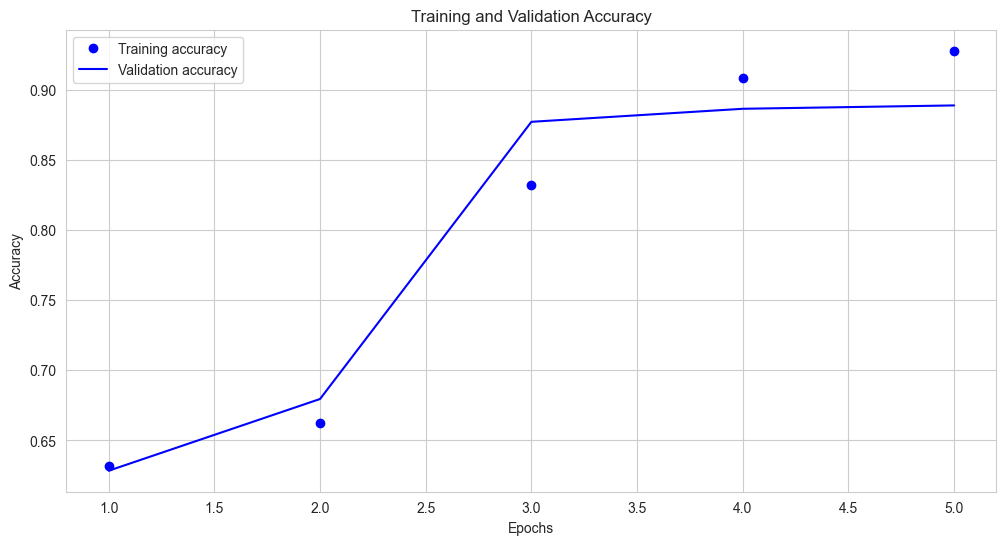

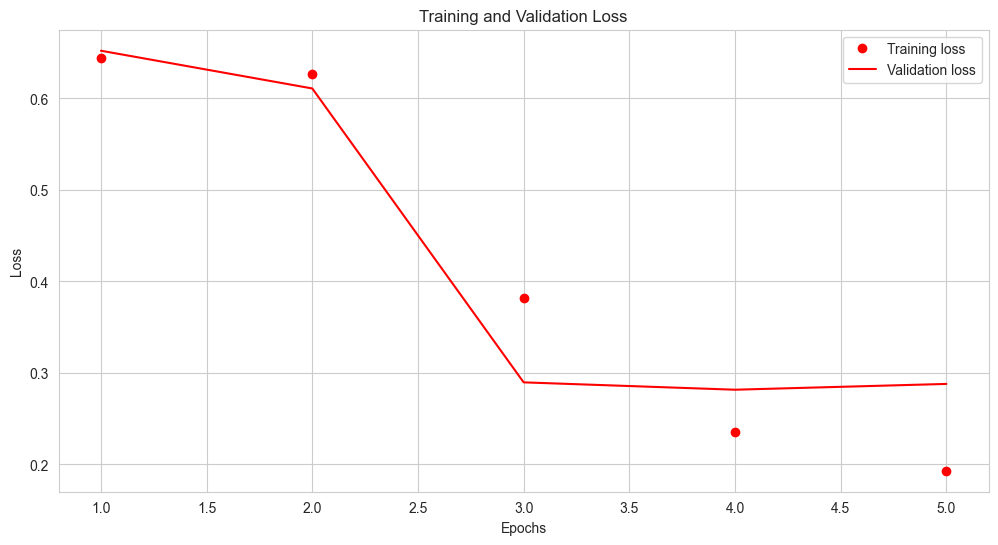

In [60]:
# We will use matplotlib to create our plots.
import matplotlib.pyplot as plt

# The 'history' object returned by model.fit() contains a dictionary
# holding the loss and accuracy values for both training and validation.
history_dict = history.history
print("Keys available in history object:", history_dict.keys())

# Let's extract the metrics from the history dictionary.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# We need a range of numbers for the x-axis, which will represent the epochs.
# The number of epochs is simply the length of our accuracy/loss lists.
epochs = range(1, len(acc) + 1)

# --- Plot 1: Training and Validation Accuracy ---

# plt.figure() creates a new figure for plotting. figsize sets the width and height.
plt.figure(figsize=(12, 6))
# 'bo' creates a blue dot for each data point.
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# 'b' creates a solid blue line.
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.legend() displays the legend with the labels we provided.
plt.legend()
# plt.show() displays the plot.
plt.show()

# --- Plot 2: Training and Validation Loss ---

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [62]:
# The model.evaluate() method computes the loss and metrics for the given data.
# It's the standard way to get the final performance score on your test set.
# We pass it the padded test features and the final numerical test labels.
# The 'verbose=2' argument just makes the output a little cleaner.
final_loss, final_accuracy = model.evaluate(x_test_padded, y_test_final, verbose=2)

# Let's print the results in a nicely formatted way.
print(f"\\nFinal LSTM Model Performance on Test Data:")
print(f"Loss: {final_loss:.4f}")
print(f"Accuracy: {final_accuracy:.4f} ({(final_accuracy * 100):.2f}%)")

313/313 - 12s - 38ms/step - accuracy: 0.8891 - loss: 0.2879
\nFinal LSTM Model Performance on Test Data:
Loss: 0.2879
Accuracy: 0.8891 (88.91%)


In [63]:
y_pred_probs = model.predict(x_test_padded)
y_pred_lstm = [1 if pro>=0.5 else 0 for pro in y_pred_probs.flatten()]

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step


\n--- LSTM Model Classification Report ---
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      5000
    Positive       0.89      0.89      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

\n--- LSTM Model Confusion Matrix ---


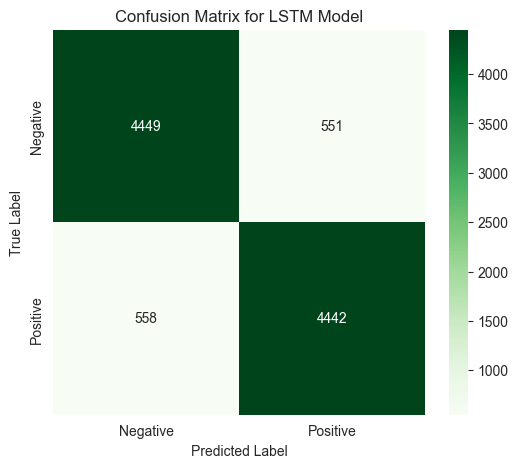

In [64]:
import seaborn as sns
print("\\n--- LSTM Model Classification Report ---")
print(classification_report(y_test_final, y_pred_lstm, target_names=['Negative', 'Positive']))

# --- Confusion Matrix ---
print("\\n--- LSTM Model Confusion Matrix ---")
cm_lstm = confusion_matrix(y_test_final, y_pred_lstm)
class_names = ['Negative', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

In [65]:
import joblib


In [66]:
from joblib import dump

In [67]:
dump(model,'DL_model.pkl')


['DL_model.pkl']